<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [33]:
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
nlp = spacy.load("en_core_web_lg")

df = pd.read_csv('data/job_listings.csv')

df['parsed']= 'blank'
for i in range(len(df)):
    soup = BeautifulSoup(df['description'][i], 'html.parser')
    df['parsed'][i] = soup.get_text()
df['parsed'] = df['parsed'].apply(lambda x : x.replace('b"', ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("b'", ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("\\n"," "))                                                      
df['parsed'] = df['parsed'].apply(lambda x : re.sub('[^a-z A-Z 0-9]', ' ', x))


C:\Python\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
print(df['description'][0])

b"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply 

In [6]:
print(df['parsed'][0])

Job Requirements  Conceptual understanding in Machine Learning models like Nai xc2 xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along with hands on experience in at least 2 of them Intermediate to expert level coding skills in Python R   Ability to write functions  clean and efficient data manipulation are mandatory for this role  Exposure to packages like NumPy  SciPy  Pandas  Matplotlib etc in Python or GGPlot2  dplyr  tidyR in R Ability to communicate Model findings to both Technical and Non Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub  Kaggle or any other published article Master s degree in Statistics Mathematics Computer Science or any other quant specific field  Apply Now 


## 2) Use Spacy to tokenize the listings 

In [7]:
df['tokens']= df['parsed'].apply(lambda x: nlp.tokenizer(x))

In [8]:
type(df['tokens'][0])

spacy.tokens.doc.Doc

In [22]:
df.shape

(426, 5)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [24]:
cv = CountVectorizer()          
dtm = cv_fit=cv.fit_transform(list(df['parsed']))
print(dtm)


  (0, 4374)	1
  (0, 6605)	1
  (0, 1724)	1
  (0, 8139)	1
  (0, 3999)	7
  (0, 4770)	1
  (0, 4568)	1
  (0, 5094)	1
  (0, 4641)	2
  (0, 5210)	1
  (0, 8711)	1
  (0, 8697)	1
  (0, 932)	1
  (0, 4916)	1
  (0, 7646)	1
  (0, 674)	1
  (0, 4652)	1
  (0, 4712)	1
  (0, 6481)	1
  (0, 5283)	1
  (0, 6339)	1
  (0, 3316)	1
  (0, 2162)	1
  (0, 8029)	1
  (0, 5326)	1
  :	:
  (425, 6534)	1
  (425, 8394)	1
  (425, 2750)	1
  (425, 2136)	1
  (425, 6475)	1
  (425, 1026)	2
  (425, 3635)	1
  (425, 5415)	1
  (425, 6893)	1
  (425, 1350)	8
  (425, 6284)	1
  (425, 6063)	1
  (425, 6722)	1
  (425, 858)	1
  (425, 6631)	1
  (425, 4800)	1
  (425, 4329)	1
  (425, 6815)	1
  (425, 1709)	1
  (425, 5397)	1
  (425, 1696)	1
  (425, 3966)	1
  (425, 3272)	1
  (425, 7093)	1
  (425, 4625)	1


In [13]:
print(cv.get_feature_names())

['00', '000', '02115', '03', '0305', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '1026036', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million

## 4) Visualize the most common word counts

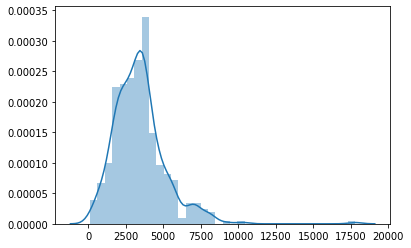

In [26]:
vect = CountVectorizer(stop_words='english', max_features=10)
data = list(df['parsed'])
#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
doc_len = [len(doc) for doc in data]
sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [31]:
##data = list(df['parsed'])
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
dtm2 = tfidf.fit_transform(data)
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.sample(17)

,ability,able,access,achieve,action,actionable,ad,additional,address,advanced,...,x99,x99ll,x99re,x99s,x9d,xc2,xe2,xef,year,years
234,0.055363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.054787,0.000000,0.0,0.092612,0.0,0.000000,0.000000
160,0.054809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096052,0.000000,0.000000,0.054238,0.000000,0.0,0.091684,0.0,0.000000,0.049728
61,0.000000,0.000000,0.000000,0.000000,0.000000,0.052403,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030579,0.069557,0.0,0.077537,0.0,0.000000,0.196256
209,0.000000,0.000000,0.000000,0.000000,0.000000,0.063475,0.000000,0.000000,0.000000,0.133746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031306,0.0,0.000000,0.033960
411,0.050733,0.054194,0.032027,0.000000,0.064054,0.057358,0.000000,0.030225,0.000000,0.040286,...,0.059273,0.063352,0.000000,0.117146,0.000000,0.0,0.169734,0.0,0.000000,0.030687
259,0.000000,0.099131,0.000000,0.000000,0.000000,0.000000,0.000000,0.110573,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
68,0.069209,0.000000,0.131071,0.000000,0.065536,0.000000,0.000000,0.000000,0.069087,0.000000,...,0.060645,0.000000,0.000000,0.068489,0.000000,0.0,0.115774,0.0,0.000000,0.031397
88,0.045700,0.000000,0.000000,0.085601,0.000000,0.000000,0.000000,0.081678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045225,0.000000,0.0,0.038224,0.0,0.000000,0.041464
420,0.000000,0.000000,0.000000,0.061579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057614,0.000000,0.062261,0.065067,0.000000,0.0,0.109988,0.0,0.000000,0.029828
84,0.000000,0.175139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [36]:
data[0][:200]

'Job Requirements  Conceptual understanding in Machine Learning models like Nai xc2 xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along w'

In [40]:
nn = NearestNeighbors(n_neighbors= 5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [43]:
nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 4.89897949, 5.        , 5.        , 5.56776436]]),
 array([[  1, 405, 355, 134, 417]], dtype=int64))

In [49]:
print(data[1])
print(data[405])

Job Description  As a Data Scientist 1  you will help us build machine learning models  data pipelines  and micro services to help our clients navigate their healthcare journey  You will do so by empowering and improving the next generation of Accolade Applications and user experiences  A day in the life xe2 x80 xa6 Work with a small agile team to design and develop mobile applications in an iterative fashion  Work with a tight knit group of development team members in Seattle  Contribute to best practices and help guide the future of our applications  Operates effectively as a collaborative member of the development team  Operates effectively as an individual for quick turnaround of enhancements and fixes  Responsible for meeting expectations and deliverables on time with high quality  Drive and implement new features within our mobile applications  Perform thorough manual testing and writing test cases that cover all areas  Identify new development tools approaches that will increase

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 